# Linear Regression

## Analysis of Diabetes Dataset

Target: a quantitative measure of disease progression one year after baseline

Features: ten numeric predictive values
- age age in years
- sex, bmi body mass index
- bp average blood pressure
- s1 tc
- total serum cholesterol
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, total cholesterol / HDL
- s5 ltg, possibly log of serum triglycerides level
- s6 glu, blood sugar level

Source URL: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html



In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Read the dataset
data = datasets.load_diabetes()

# Features
X = data.data
# Target
y = data.target
# feature's names
feature_names = data.feature_names

# Show the datasets
df = pd.DataFrame(X, columns = feature_names)
df['target'] = y
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [10]:
print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (442, 10)
y: (442,)


In [12]:
# Split the dataset into training data and test data in an 80 : 20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

linear_regr = LinearRegression(fit_intercept = True)

# Fitting
linear_regr.fit(X_train, y_train)

# Evaluate teh predictions on the test data
y_predict = linear_regr.predict(X_test)

In [15]:
# Show weights
print(f'Weight, non-constant terms of x: {linear_regr.coef_}')
print(f'Weight, constant term: {linear_regr.intercept_}')
# Coefficient of determination 決定係数: 1 is perfect prediction
print("Coefficient of determination: {:.2f}".format(r2_score(y_test, y_predict)))

Weight, non-constant terms of x: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Weight, constant term: 151.34560453985995
Coefficient of determination: 0.45


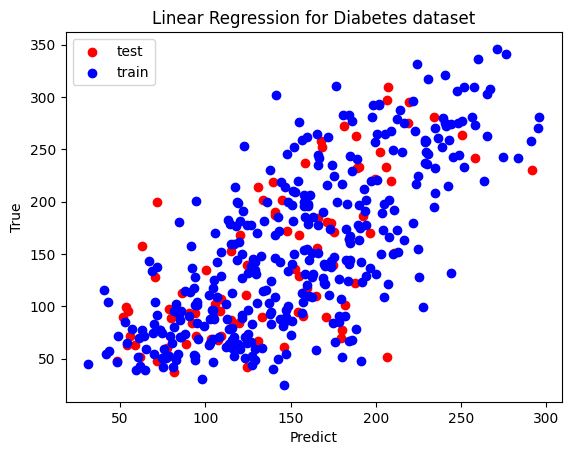

In [18]:
# Plot outputs
plt.scatter(y_predict, y_test, color="red", label='test')
plt.scatter(linear_regr.predict(X_train), y_train, color = 'blue', label='train')


plt.title('Linear Regression for Diabetes dataset')
plt.xlabel('Predict')
plt.ylabel('True')
plt.legend()
plt.show()

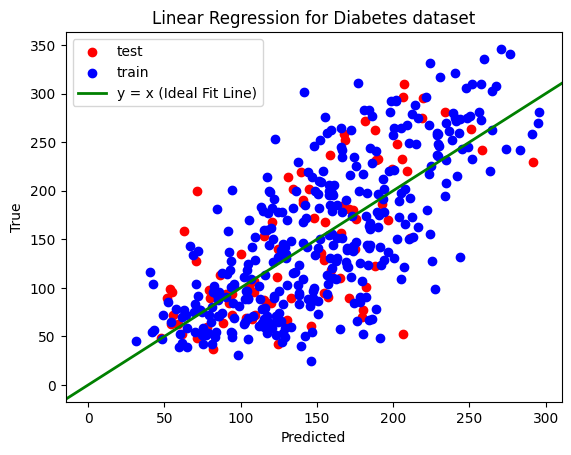

In [19]:
# Plot outputs
fig, ax = plt.subplots()
ax.scatter(y_predict, y_test, color="red", label='test')
ax.scatter(linear_regr.predict(X_train), y_train, color='blue', label='train')

# draw a linear line
ax.axline((0, 0), slope=1, color='green', lw=2, label='y = x (Ideal Fit Line)')

ax.set_title('Linear Regression for Diabetes dataset')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

ax.legend()

plt.show()